In [1]:
import matplotlib.pyplot as plt
from scipy import signal
from scipy import fft
import sympy as sp
import numpy as np
import math
%run 'shared.ipynb' # holds notes + SP specific functions

In [2]:
# A.2
c1 = 1 * 10**(-9)
c2 = 2*c1
c = c2
f0 = 8 * 10**3
w0 = 2*sp.pi*f0
q = 5

## a)
r1, r2 = sp.symbols("R_1 R_2")
r2 = sp.solve(sp.Eq(w0/q, 3/(c*r2)), r2)[0]
r1 = sp.solve(sp.Eq(w0**2, 2/(r1*r2*c**2)), r1)[0]
display(r2, r1)

## b) find the gain at f0
s = sp.symbols("s")
Hs = -((1)/(r1*c)*s)/(s**2+3/(c*r2)*s+2/(r1*r2*c**2))
HsCenterGain = Hs.subs({s: 1j*w0}).evalf()
HsCenterGaindB = (20*sp.log(abs(HsCenterGain), 10)).evalf()
display(HsCenterGain, HsCenterGaindB)

## c) S_{R_2}^Q
### declare variables first
w0, q, c, r1, r2 = sp.symbols("w_0 Q C R_1 R_2")
q = sp.solve(sp.Eq(w0/q, 3/(c*r2)), q)[0]
sensiExp = lambda x, y: (x/y)*sp.diff(y,x)
s = sensiExp(r2,q)
display(q, s)

149207.759148652

1326.29119243246

-37.5 - 1.50206953476786e-13*I

31.4806253545544

C*R_2*w_0/3

1

In [3]:
# A.3
Omega0 = 1000
B = 400
Omegas = 800
asdB = 40

## b)
n = sp.symbols("n")
ws = abs((Omega0**2-Omegas**2)/(Omegas*B))
#ws, asdB, n = sp.symbols("w_s as_{db} n")
#display(10*sp.log(1/(1+ws**(2*n)), 10))
exp = sp.Eq(asdB, 10*sp.log(1/(1+ws**(2*n)), 10))
n = sp.solve(exp, n)
display(exp, n)

w = ws
db = 40
sp.log(1/(10**(db/10))-1, 10)/(2*sp.log(w, 10))


#display(ws)

Eq(40, 10*log(1/(1.125**(2*n) + 1))/log(10))

[-0.000424530577667865 + 13.3363545780692*I]

-0.000424530577667818 + 4.24509350785188*I*pi

array([0.5715+0.29374777j, 0.5715-0.29374777j])

array([-1., -1.])

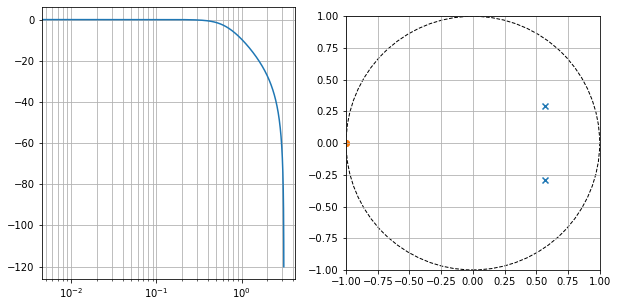

In [8]:
# B.1
num = [0.06745, 0.1349, 0.06745]
den = [1, -1.143, 0.4129]
tf = signal.TransferFunction(num, den)
display(tf.poles, tf.zeros)

fig, ax = plt.subplots(ncols=2, figsize=(10,5))
plotFilterDigital(ax[0], num, den, "")
simplezplane(ax[1], num, den, "")

In [5]:
## B.2
fs = 4000
fc = 250
MVal = 5

# 1. calculate wc
wc = (2*sp.pi*fc)/fs

# 2. calculate impulse response
## setup our variables we need
j, w, M, n = sp.symbols("j w M n")
## our inner expression
expToInt = sp.exp(-(j*w*M)/2)*sp.exp(j*w*n)
## setup the integral and rewrite + simplify it + extract 
## the final expression we want
Hd = (1/(2*sp.pi))*sp.integrate(expToInt, (w, -1*wc, wc))
Hd = Hd.rewrite(sp.sin).simplify()
HdExp = Hd.args[1][0] # we want the secound one, and the equation [x][1] is the cond
display(Hd,HdExp)
## calculate the values
HdVals = np.empty(MVal+1)
for nval in range(0,MVal+1):
    finalHd = HdExp.subs({j: 1j, M: MVal, n: nval}).evalf()
    HdVals[nval] = finalHd
    display("For H_d[{}] = {}".format(nval, finalHd))
    
# 3. Calculate for hamming window
wVals = np.empty(MVal+1)
w = lambda n, M: 0.54 - 0.46*sp.cos(2*sp.pi*n/M)
for nval in range(0,MVal+1):
    val = w(nval,MVal).evalf(4)
    wVals[nval] = val
    display("For w[{}] = {}".format(nval,val))
    
# 4. Find h (h = Hd * w)
h = HdVals * wVals
display(h)

# Finding the amplitude response at DC (we have e**(j*0)=1, each place, therefore we can sum. look at the paper)
display(h.sum(), 20*sp.log(h.sum(), 10).evalf())

Piecewise((1/8, Eq(j, 0) | Eq(M, 2*n)), (2*sinh(pi*j*(M - 2*n)/16)/(pi*j*(M - 2*n)), True))

2*sinh(pi*j*(M - 2*n)/16)/(pi*j*(M - 2*n))

'For H_d[0] = 0.105865999062922'

'For H_d[1] = 0.117895665093048'

'For H_d[2] = 0.124198356393026'

'For H_d[3] = 0.124198356393026'

'For H_d[4] = 0.117895665093048'

'For H_d[5] = 0.105865999062922'

'For w[0] = 0.08000'

'For w[1] = 0.3979'

'For w[2] = 0.9121'

'For w[3] = 0.9121'

'For w[4] = 0.3979'

'For w[5] = 0.08000'

array([0.00846927, 0.04690524, 0.11328722, 0.11328722, 0.04690524,
       0.00846927])

0.33732347855216543

-9.43906859567724

In [6]:
## B.3
Td, z, op = sp.symbols("T_d z \Omega_{pre}")
exp = op/(op+(2/Td)*((z-1)/(z+1)))
display(exp)
display(exp.subs({Td: 1/1000, op: 845}).simplify())
expFactor = exp.subs({Td: 1/1000, op: 845}).factor().simplify()
display(expFactor)

expFactor.subs({z: sp.exp(1j*0.7998)}).evalf()
wc = 2*sp.pi*(800/1000)
testExp = (0.2970*(1+sp.exp(-1j*wc)))/(1-0.4024*sp.exp(-1j*wc))
display(testExp.rewrite(sp.cos))
display(testExp.evalf())

\Omega_{pre}/(\Omega_{pre} + 2*(z - 1)/(T_d*(z + 1)))

845*(z + 1)/(2845.0*z - 1155.0)

0.29701230228471*(z + 1)/(1.0*z - 0.40597539543058)

(0.297*cos(1.6*pi) + 0.297 + 0.297*I*cos(0.1*pi))/(-0.4024*cos(1.6*pi) + 1 - 0.4024*I*cos(0.1*pi))

0.254409125058944 + 0.433765532350105*I

In [7]:
# c.1
s1 = np.array([1,1,1,0,0,0,1,1])
s2 = np.array([1,1,0,0,0,0,-1,-1])
s3 = np.array([0,1,1,0,0,0,-1,-1])
s4 = np.array([0,1,1,0,0,0,1,1])

for s in [s1, s2, s3, s4]:
    display(fft.fft(s).imag)
    
# c.3
# https://cnx.org/contents/0sbTkzWQ@2.2:zmcmahhR@7/Decimation-in-time-DIT-Radix-2-FFT
# given as (N**2/2)
N = 512
x = N**2/2
y = 50/x
f = (2048**2)/2*y
display(y, f)

# c.4
fs = 10*10**3
ms = 10*10**(-3)
display(fs,ms,fs*ms)

array([-0.,  0., -0.,  0., -0., -0.,  0., -0.])

array([-0.        , -2.41421356, -2.        , -0.41421356, -0.        ,
        0.41421356,  2.        ,  2.41421356])

array([-0.        , -3.41421356, -2.        ,  0.58578644, -0.        ,
       -0.58578644,  2.        ,  3.41421356])

array([-0.,  0., -0.,  0., -0., -0.,  0., -0.])

0.0003814697265625

800.0

10000

0.01

100.0